## Titanic: Machine Learning from the Disaster
O desafio do Titanic é uma das competições de data science mais populares do site [kaggle.com](www.kaggle.com), famoso por esse tipo de desafio. Toda essa popularidade tornou ele praticamente um **_Hello, world_** no mundo de data science. Essa é minha tentativa nesse desafio.   

O naufrágio do Titanic é um dos acidentes marítimos mais famosos da história. Considerado *o navio mais moderno do mundo à sua época*, foi placo de uma combinação de imperícia, imprudência e negligência que culminou com seu naufrágio após colidir com um iceberg em 15 de abril de 1912. Dos 2224 passageiros 1502 morreram.

<center><img src="Images/dewfewddng.png" width="600" ><center>


Uma das principais causas de tantas mortes foi a falta de botes salva vidas suficientes para a tripulação e passageiros. Agora, mais de 100 anos após o acidente podemos investigá-lo com dados **reais**.

Será que os botes foram igualmente distribuídos entre passageiros de 1ª, 2ª e 3ª classe? Será que o cavalheirismo se manteve na hora do desespero e mulheres e crianças realmente foram primeiro? Qual seria sua chance de sobreviver se estivesse no no Titanic no momento do naufrágio?

#### O objetivo final do desafio é usar os dados reais do naufrágio para determinar a chance de sobrevivência dos passageiros do Titanic

### Sumário
[Análise Exploratória](#Análise-Exploratória)
<br>[Preparação dos Dados](#Preparação-dos-Dados)
<br>[Construção do Modelo](#Construção-do-Modelo)
    

### Análise Exploratória <a name="Análise-Exploratória"></a>
#### Dicionário de Dados
**PassengerId:** Número de identificação do passageiro
- **Survived:** Informa se o passageiro sobreviveu ao desastre
    - 0 = Não
    - 1 = Sim
- **Pclass:** Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
- **Name:** Nome do passageiro
- **Sex** Sexo do passageiro
- **Age:** Idade do passageiro
- **SibSp:** Quantidade de cônjuges e irmãos a bordo
- **Parch:** Quantidade de pais e filhos a bordo
- **Ticket:** Número de identificação da passagem
- **Fare:** Preço pago pela Passagem
- **Cabin:** Identificação da cabine do passageiro
- **Embarked:** Porto no qual o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [1]:
#Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [29]:
#Carregando nossos sets de treinamento e de teste
train_df = pd.read_csv('data/titanic_train.csv')
test_df = pd.read_csv('data/titanic_test.csv')
#Avisando quando acabar
print("Files ready!")
#Vamos ver o formato dos dados
train_df.shape

Files ready!


(891, 12)

Podemos perceber que temos dados de 891 passageiros no nosso conjunto de teste e 12 variáveis para explorar. Vamos dar uma olhada em quais são essas variáveis e que informações temos sobre elas:

In [3]:
#Vamos dar uma olhada na situação dos dados brutos
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Descobrindo o número de informações faltantes:
train_df.isnull().sum()/train_df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [5]:
#Olhando um breve resumo estatístico dos dados.
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Vemos que coluna 'Cabin' possui o maior número de informações faltantes, com 77% das colunas vazias, seguida por 'Age', com '20%, e 'Embarked' com 0,2%.
<br>Sabemos a partir do sumário estatístico que, para o grupo de treino:
- Menos da metade dos passageiros sobreviveu
- Mais da metade dos passageiros eram de terceira classe
- Pelo menos três quartos dos passageiros possuiam menos de 38 anos, constituindo uma população majoritariamente jovem, apesar do passageiro mais velho possuir 80 anos de idade.
- Pelo menos três quartos dos passageiros não possuiam mais de um irmão ou cônjuge a bordo sendo que pelo menos metade não possuia nenhum
- Mais de três quartos dos passageiros não possuiam filhos ou pais a bordo
- O preço da passagem variou bastante indo de 0 (gratuito) até 512
<br>Vamos observar as variáveis mais individualmente agora

In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Augustsson, Mr. Albert",male,1601,B96 B98,S
freq,1,577,7,4,644


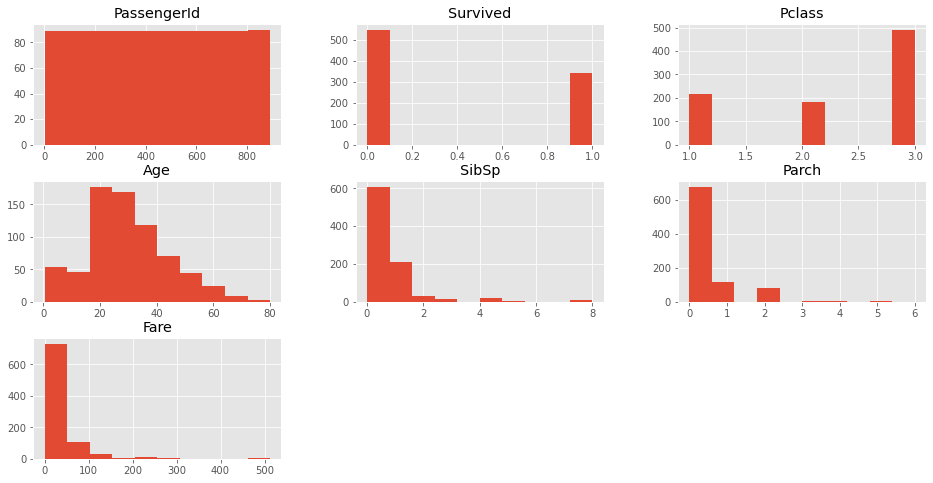

In [7]:
train_df.hist(figsize=(16,8));

O histograma de survived nos mostra que aproximadamente 1/3 do grupo de treino sobreviveu, enquanto a proporção para a população geral é de aproximadamente 1/4. O restante das variáveis confirmam as conclusões tiradas do resumo estatístico, mas não adicionam muito a análise. Vamos investigar um pouco a influência do sexo, classe do bilhete e idade:

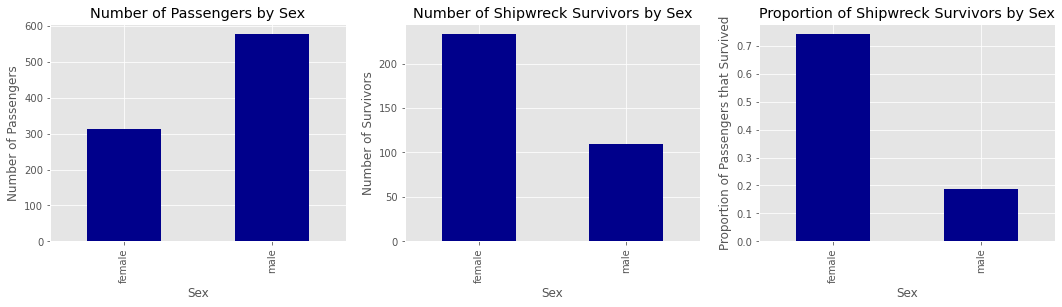

In [8]:
#Criando a figura com 2 gráficos
fig0, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(18,4))

my_colors = ('darkred','darkblue')
#Gráfico 1 - Investigando o número de homens e mulheres entre os passageiros que embarcaram
train_df[['Sex','PassengerId']].groupby(['Sex']).count().plot(kind = 'bar', ax=ax0, color="darkblue", legend=None)

ax0.set_xlabel('Sex')
ax0.set_ylabel('Number of Passengers')
ax0.set_title('Number of Passengers by Sex')

#Gráfico 2 - Investigando o número de homens e mulheres entre os passageiros que sobreviveram
train_df[['Sex','Survived']].groupby(['Sex']).sum().plot(kind = 'bar', ax=ax1, color="darkblue", legend=None)

ax1.set_xlabel('Sex')
ax1.set_ylabel('Number of Survivors')
ax1.set_title('Number of Shipwreck Survivors by Sex')

#Gráfico 3 - Comparando os dois pela proporção
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot(kind = 'bar', color="darkblue", ax=ax2, legend=None)

ax2.set_xlabel('Sex')
ax2.set_ylabel('Proportion of Passengers that Survived')
ax2.set_title('Proportion of Shipwreck Survivors by Sex')

plt.show()

"Mulheres e crianças primeiro" resume bem o que os gráficos mostram. Mesmo em menor proporção no navio a maior parte dos sobreviventes foram mulheres e cerca de 70% das que embarcaram sobreviveram contra aproximadamente 20% dos homens.

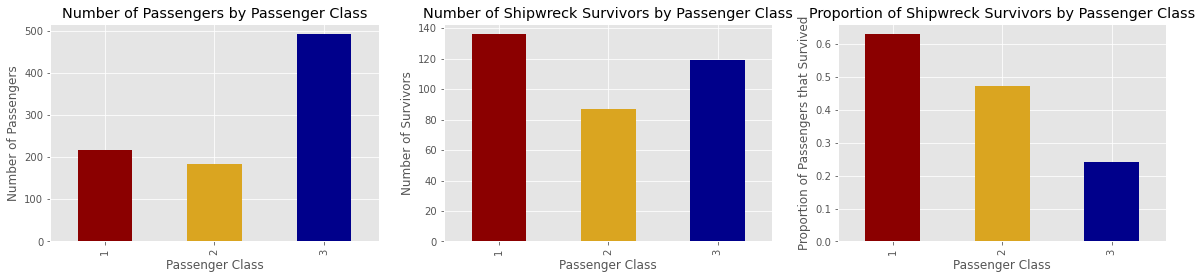

In [9]:
#Criando a figura com 2 gráficos
fig1, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(20,4))

#Gráfico 1 - Investigando o número de homens e mulheres entre os passageiros que embarcaram
train_df[['Pclass','PassengerId']].groupby(['Pclass']).count().plot(kind = 'bar', ax=ax0, color=('darkred','goldenrod','darkblue'), legend=None)

ax0.set_xlabel('Passenger Class')
ax0.set_ylabel('Number of Passengers')
ax0.set_title('Number of Passengers by Passenger Class')

#Gráfico 2 - Investigando o número de homens e mulheres entre os passageiros que sobreviveram
train_df[['Pclass','Survived']].groupby(['Pclass']).sum().plot(kind = 'bar', ax=ax1, color=('darkred','goldenrod','darkblue'), legend=None)

ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Number of Survivors')
ax1.set_title('Number of Shipwreck Survivors by Passenger Class')

#Gráfico 3 - Comparando os dois pela proporção
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().plot(kind = 'bar', ax=ax2, color=('darkred','goldenrod','darkblue'), legend=None)

ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Proportion of Passengers that Survived')
ax2.set_title('Proportion of Shipwreck Survivors by Passenger Class')

plt.show()

Quanto a classe do bilhete temos que, mesmo embarcando em números muito menores que a 3ª classe, a 1ª e 2ª sobreviveram em números maiores. Cerca de 60% da primeira classe e 50% da segunda sobreviveram, enquanto apenas aproximadamente 25% da terceira classe escapou com vida.

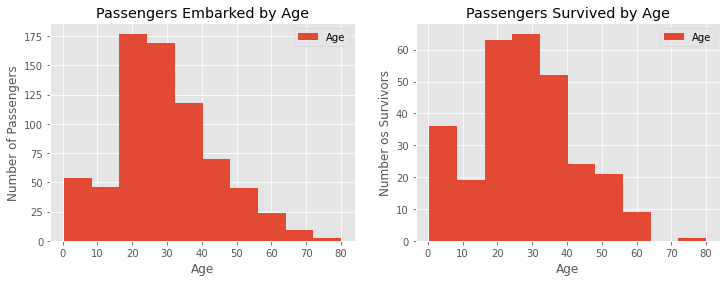

In [10]:
#Criando a figura com 2 gráficos
fig2, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

#GRáfico 1 - investigando o histograma de idades daqueles que embarcaram
train_df[['Age']].plot(kind='hist', ax=ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('Number of Passengers')
ax0.set_title('Passengers Embarked by Age')

#Gráfico 2 - Investigando o histograma de idades daqueles que sobreviveram
train_df[['Age']].loc[train_df['Survived']==1].plot(kind='hist', ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number os Survivors')
ax1.set_title('Passengers Survived by Age')

plt.show()

Ao que tudo indica crianças e idosos sobreviveram proporcionalmente um pouco mais que jovens e adultos, com destaque para a faixa de 0 a 10 anos. Por fim, vamos dar uma olhada geral nas correlações das variáveis discretas:

<AxesSubplot:>

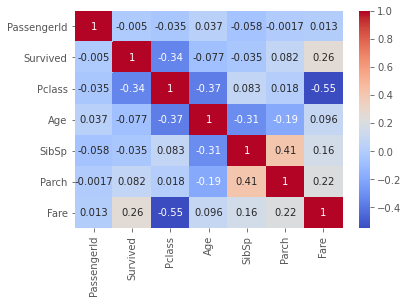

In [11]:
sns.heatmap(train_df.corr(),cmap='coolwarm', annot=True)

Nenhuma correlação forte encontrada com a variável alvo, 'Survived'. Sigamos para a prepação dos dados

### Preparação dos Dados <a name="Preparação-dos-Dados"></a>
Agora que entendemos melhor os dados é hora de prepará-los para a modelagem. Vamos começar por juntar os _datasets_ de treino e de teste para facilitar as modificações.

In [12]:
# Salvando os índices dos datasets para recuperação posterior
train_id = train_df.shape[0]
test_id = test_df.shape[0]

# Salvando PassengerId para submissao ao Kaggle
passengerId = test_df['PassengerId']

# Extraindo coluna 'Survived' e excluindo do dataset de treino
target = train_df[['Survived']].copy()
train_df.drop(['Survived'], axis=1, inplace=True)

# Concatenando treino e teste em um único DataFrame
concat_df = pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)
concat_df.shape

(1309, 11)

#### Escolhendo _Features_
As variáveis 'PassengerId','Name', 'Cabin' e 'Ticket' são apenas identificadores e claramente não tem relação com a chance de sobrevivência de alguém, portanto serão abandonadas.

In [13]:
concat_df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)
concat_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


#### Valores Faltantes
Vamos checar os valores faltantes no _dataset_. Para 'Age' e 'Fare' usaremos a mediana como substituto e para 'Embarked' o valor mais frequente.

In [14]:
concat_df.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [15]:
#Substituindo os valores
concat_df['Age'].replace(np.nan, concat_df['Age'].median() , inplace=True)
concat_df['Fare'].replace(np.nan, concat_df['Fare'].median() , inplace=True)
concat_df['Embarked'].replace(np.nan, concat_df['Embarked'].value_counts()[0] , inplace=True)
#Checando se ainda existe algum valor faltante
concat_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Preparando variáveis para o modelo
O modelo trabalha com variáveis numéricas, então vamos converter 'Sex' em 0 e 1 e criar _Dummies_ para 'Embarked'.

In [16]:
#Substituindo 'male' and 'female' por 0 e 1 respectivamente
concat_df['Sex']=concat_df['Sex'].map({'male':0,'female':1})
#Criando Dummies para 'Embarked'
embarked_dummies = pd.get_dummies(concat_df['Embarked'], prefix='Embarked')
concat_df = pd.concat([concat_df, embarked_dummies], axis=1)
concat_df.drop('Embarked', axis=1, inplace=True)
#Vamos ver o resultado
concat_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


#### Recuperando datasets de treino e teste
Agora vamos separar novamente nossos datasets para que possamos terminar o desafio

In [17]:
#Separando datasets de treino e teste
train_df = concat_df.iloc[:train_id]
test_df = concat_df.iloc[train_id:]

### Construção do Modelo <a name="Construção-do-Modelo"> </a> 
É a hora que todos estavam esperando. Agora que a parte mais trabalhosa passou, vamos construir um modelo para predizer quem sobreviveria ao Titanic. Aqui, como precisamos de um modelo que nos retorne 'sim' ou 'não' e não uma previsão numérica, vou escolher usar um modelo de árvore de decisão.

In [18]:
from sklearn.tree import DecisionTreeClassifier
#Criando um modelo de árvore de decisão
tree_class = DecisionTreeClassifier(max_depth=4)
tree_class.fit(train_df, target)
#Verificando o quão bem ele prediz o comportamento dos dados de treino
round(tree_class.score(train_df, target) * 100, 2)

83.5

Nosso modelo acerta 83,5% das vezes para o dataset de treino. Ele foi criado usando esse dataset, então é esperado que tenha uma acurácia maior para ele. O quanto essa acurácia vai cair na população real depende do quão representativos foram os dados de treino e das _Features_ corretas terem sido escolhidas. Vamos gerar o arquivo para submissão e ver como nos saímos:

In [19]:
#Gerando predições
prediction_df = tree_class.predict(test_df)

#Adicionando PassengerId para identificação
submission_df = pd.DataFrame({"PassengerId": passengerId,"Survived": prediction_df})

#Gerando arquivo csv para submissão
submission_df.to_csv('./submission_tree.csv', index=False)

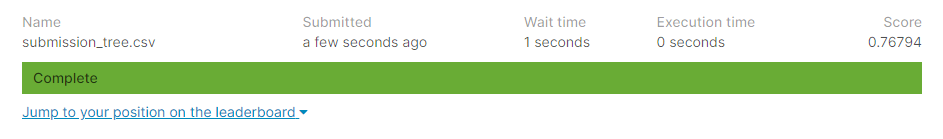

E nosso resultado final foi de 76,8% de precisão nas previsões do grupo de teste.

### Eu sobreviveria ao Titanic?
Para finalizar esse projeto não posso evitar de testar se eu sobreviveria ao Titanic se estivesse lá na época. Sou Rodrigo Silveira, tenho 23 anos, provavelmente viajaria na 2ª classe sozinho pagando a passagem média.

In [23]:
Rodrigo_Silveira=np.array([2,0,23,0,0,32.2,0,1,0,0]).reshape(1,-1)
print('Rodrigo Silveira:')
if((tree_class.predict(Rodrigo_Silveira)[0])==1):
  print('sobreviveu! Uhuuuul!')
else:
    print('Está no fundo do oceano nesse momento.')


Rodrigo Silveira:
Está no fundo do oceano nesse momento.
